In [7]:
import pandas as pd
try:
    df = pd.read_excel('christmas_billboard_data.csv')
except:
    import xlwings as xw
    df = xw.Book('christmas_billboard_data.csv')
    df = df.sheets(1).used_range.options(pd.DataFrame, index = False).value


In [8]:
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go
import missingno as msno
import seaborn as sns
from plotly.subplots import make_subplots

In [9]:
df

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart,year,month,day
0,http://www.billboard.com/charts/hot-100/1958-1...,12/13/1958,83.0,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1.0,NaN,69.0,3.0,1958.0,12.0,13.0
1,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,57.0,JINGLE BELL ROCK,Bobby Helms,Jingle Bell RockBobby Helms,1.0,NaN,29.0,19.0,1958.0,12.0,20.0
2,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,73.0,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1.0,83.0,69.0,3.0,1958.0,12.0,20.0
3,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,86.0,WHITE CHRISTMAS,Bing Crosby,White ChristmasBing Crosby,1.0,NaN,12.0,13.0,1958.0,12.0,20.0
4,http://www.billboard.com/charts/hot-100/1958-1...,12/27/1958,44.0,GREEN CHRI$TMA$,Stan Freberg,Green Chri$tma$Stan Freberg,1.0,NaN,44.0,2.0,1958.0,12.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,http://www.billboard.com/charts/hot-100/2017-0...,1/7/2017,16.0,ALL I WANT FOR CHRISTMAS IS YOU,Mariah Carey,All I Want For Christmas Is YouMariah Carey,6.0,20.0,11.0,19.0,2017.0,1.0,7.0
383,http://www.billboard.com/charts/hot-100/2017-0...,1/7/2017,27.0,ROCKIN' AROUND THE CHRISTMAS TREE,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,6.0,48.0,14.0,18.0,2017.0,1.0,7.0
384,http://www.billboard.com/charts/hot-100/2017-0...,1/7/2017,48.0,IT'S THE MOST WONDERFUL TIME OF THE YEAR,Andy Williams,It's The Most Wonderful Time Of The YearAndy W...,1.0,NaN,48.0,1.0,2017.0,1.0,7.0
385,http://www.billboard.com/charts/hot-100/2017-0...,1/14/2017,35.0,ALL I WANT FOR CHRISTMAS IS YOU,Mariah Carey,All I Want For Christmas Is YouMariah Carey,6.0,16.0,11.0,19.0,2017.0,1.0,14.0


In [10]:
df.isnull().sum()

url                         0
weekid                      0
week_position               0
song                        0
performer                   0
songid                      0
instance                    0
previous_week_position    108
peak_position               0
weeks_on_chart              0
year                        0
month                       0
day                         0
dtype: int64

<AxesSubplot:>

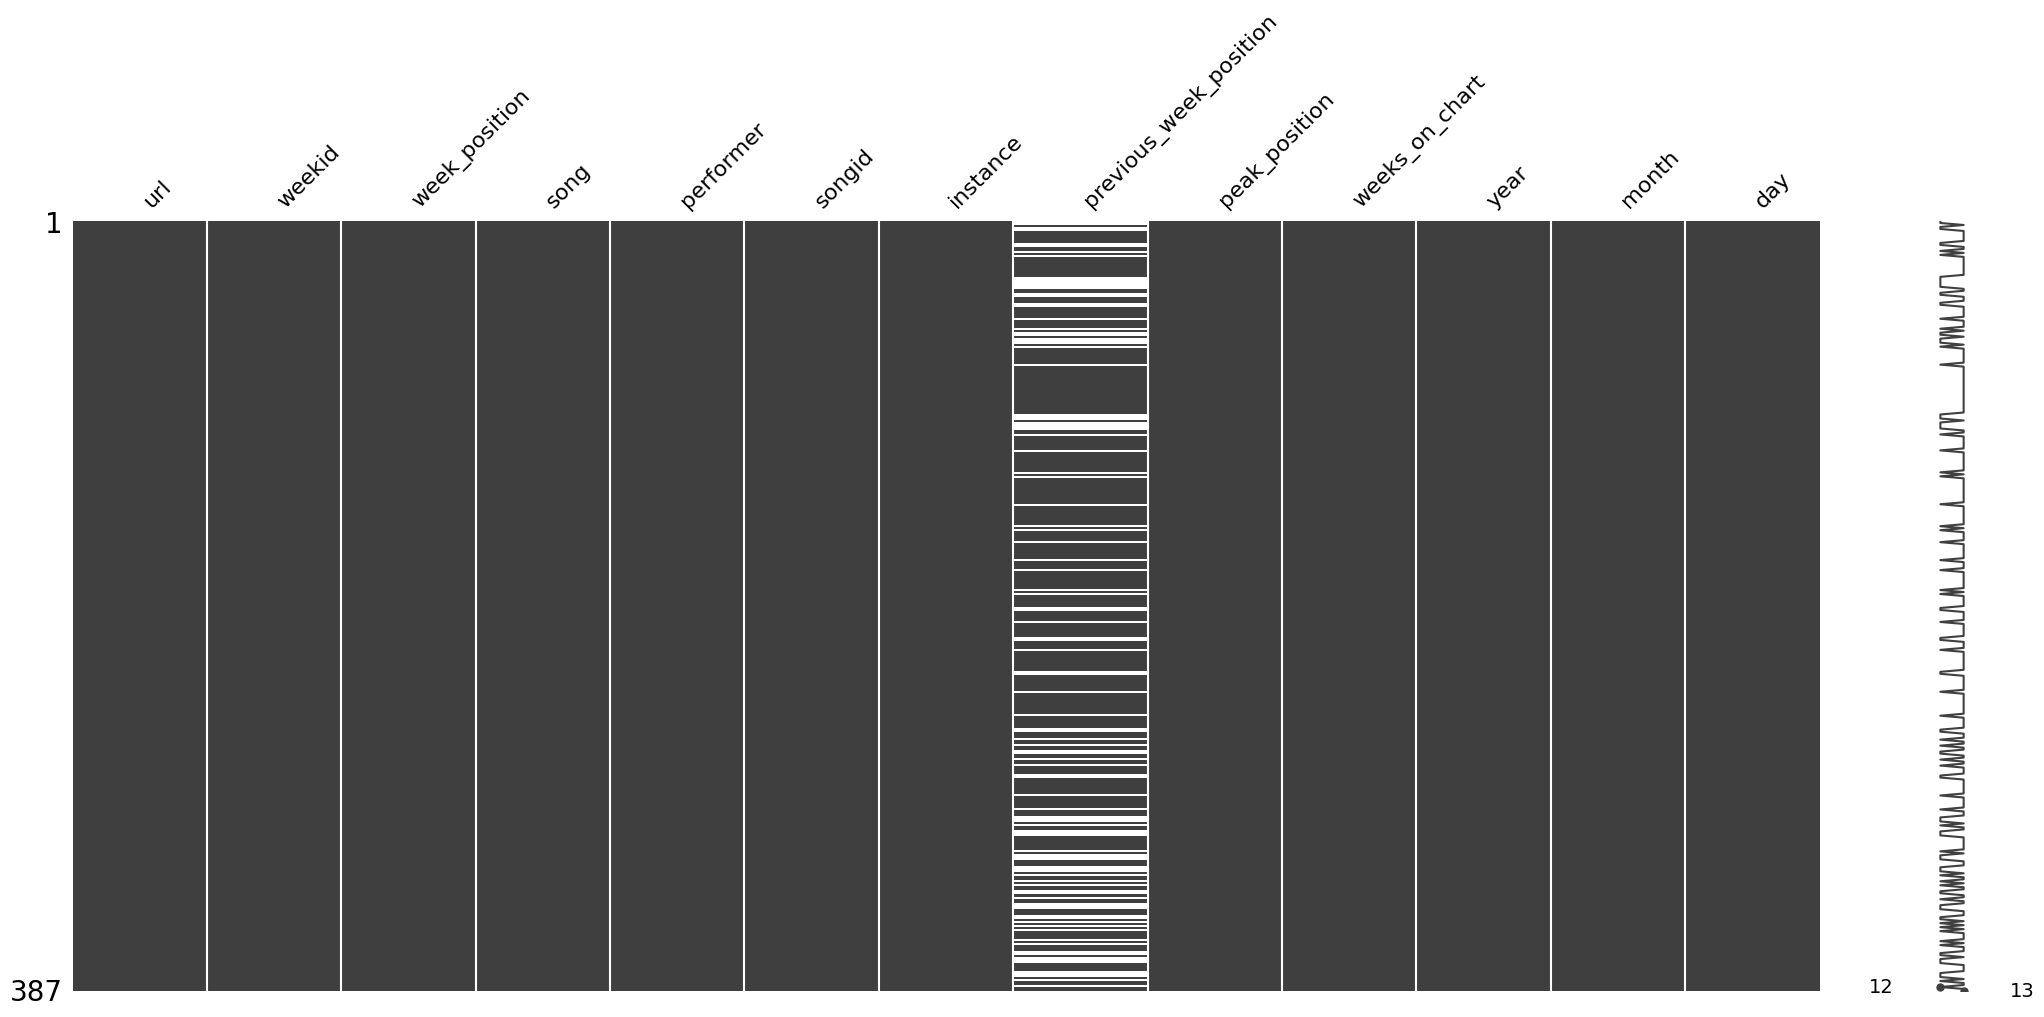

In [11]:
# 결측치 시각화
msno.matrix(df)

In [12]:
df.fillna(0, inplace=True)
df.drop('url', axis=1, inplace=True)

In [13]:
df

,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart,year,month,day
0,12/13/1958,83.0,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1.0,0.0,69.0,3.0,1958.0,12.0,13.0
1,12/20/1958,57.0,JINGLE BELL ROCK,Bobby Helms,Jingle Bell RockBobby Helms,1.0,0.0,29.0,19.0,1958.0,12.0,20.0
2,12/20/1958,73.0,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1.0,83.0,69.0,3.0,1958.0,12.0,20.0
3,12/20/1958,86.0,WHITE CHRISTMAS,Bing Crosby,White ChristmasBing Crosby,1.0,0.0,12.0,13.0,1958.0,12.0,20.0
4,12/27/1958,44.0,GREEN CHRI$TMA$,Stan Freberg,Green Chri$tma$Stan Freberg,1.0,0.0,44.0,2.0,1958.0,12.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
382,1/7/2017,16.0,ALL I WANT FOR CHRISTMAS IS YOU,Mariah Carey,All I Want For Christmas Is YouMariah Carey,6.0,20.0,11.0,19.0,2017.0,1.0,7.0
383,1/7/2017,27.0,ROCKIN' AROUND THE CHRISTMAS TREE,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,6.0,48.0,14.0,18.0,2017.0,1.0,7.0
384,1/7/2017,48.0,IT'S THE MOST WONDERFUL TIME OF THE YEAR,Andy Williams,It's The Most Wonderful Time Of The YearAndy W...,1.0,0.0,48.0,1.0,2017.0,1.0,7.0
385,1/14/2017,35.0,ALL I WANT FOR CHRISTMAS IS YOU,Mariah Carey,All I Want For Christmas Is YouMariah Carey,6.0,16.0,11.0,19.0,2017.0,1.0,14.0


In [14]:
df['song'].value_counts()[:10].index

Index(['JINGLE BELL ROCK', 'ALL I WANT FOR CHRISTMAS IS YOU',
       'ROCKIN' AROUND THE CHRISTMAS TREE', 'WHITE CHRISTMAS',
       'THE CHIPMUNK SONG (CHRISTMAS DON'T BE LATE)', 'MISTLETOE',
       'BETTER DAYS', 'THIS ONE'S FOR THE CHILDREN', 'AMEN',
       'PLEASE COME HOME FOR CHRISTMAS'],
      dtype='object')

In [15]:
list(df['song'].value_counts()[:10].values)

[28, 20, 19, 16, 16, 14, 13, 12, 11, 11]

<AxesSubplot:>

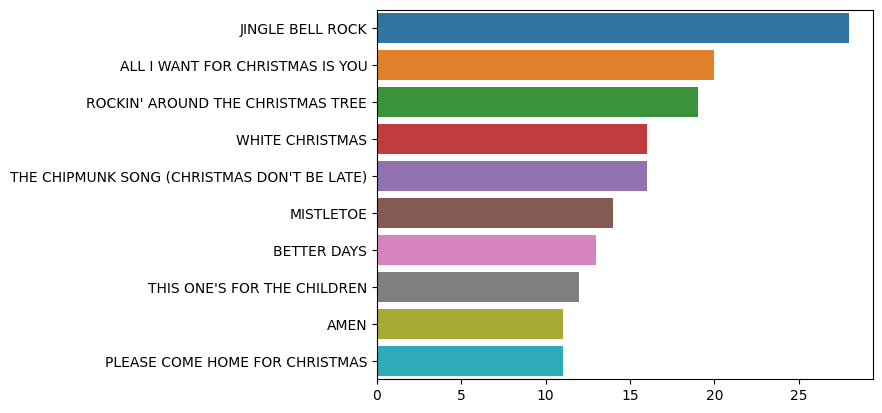

In [16]:
sns.barplot(x=list(df['song'].value_counts()[:10].values), y=list(df['song'].value_counts()[:10].index))

In [17]:
px.bar(x=list(df['song'].value_counts()[:10].values), y=list(df['song'].value_counts()[:10].index), text=list(df['song'].value_counts()[:10].values), title="차트인 많이 한 노래 TOP10"
,color=list(df['song'].value_counts()[:10].index), color_continuous_scale='rainbow',pattern_shape_sequence=['x'])

In [18]:
px.line(x=list(df['song'].value_counts()[:10].index), y=list(df['song'].value_counts()[:10].values), text=list(df['song'].value_counts()[:10].values), title="차트인 많이 한 TOP10")

In [19]:
px.bar(x=list(df['performer'].value_counts()[:10].values), y=list(df['performer'].value_counts()[:10].index), text=list(df['performer'].value_counts()[:10].values), title="차트인 많이 한 아티스트 TOP10",
color=list(df['performer'].value_counts()[:10].index) ,color_continuous_scale='rainbow',pattern_shape_sequence=['x'])

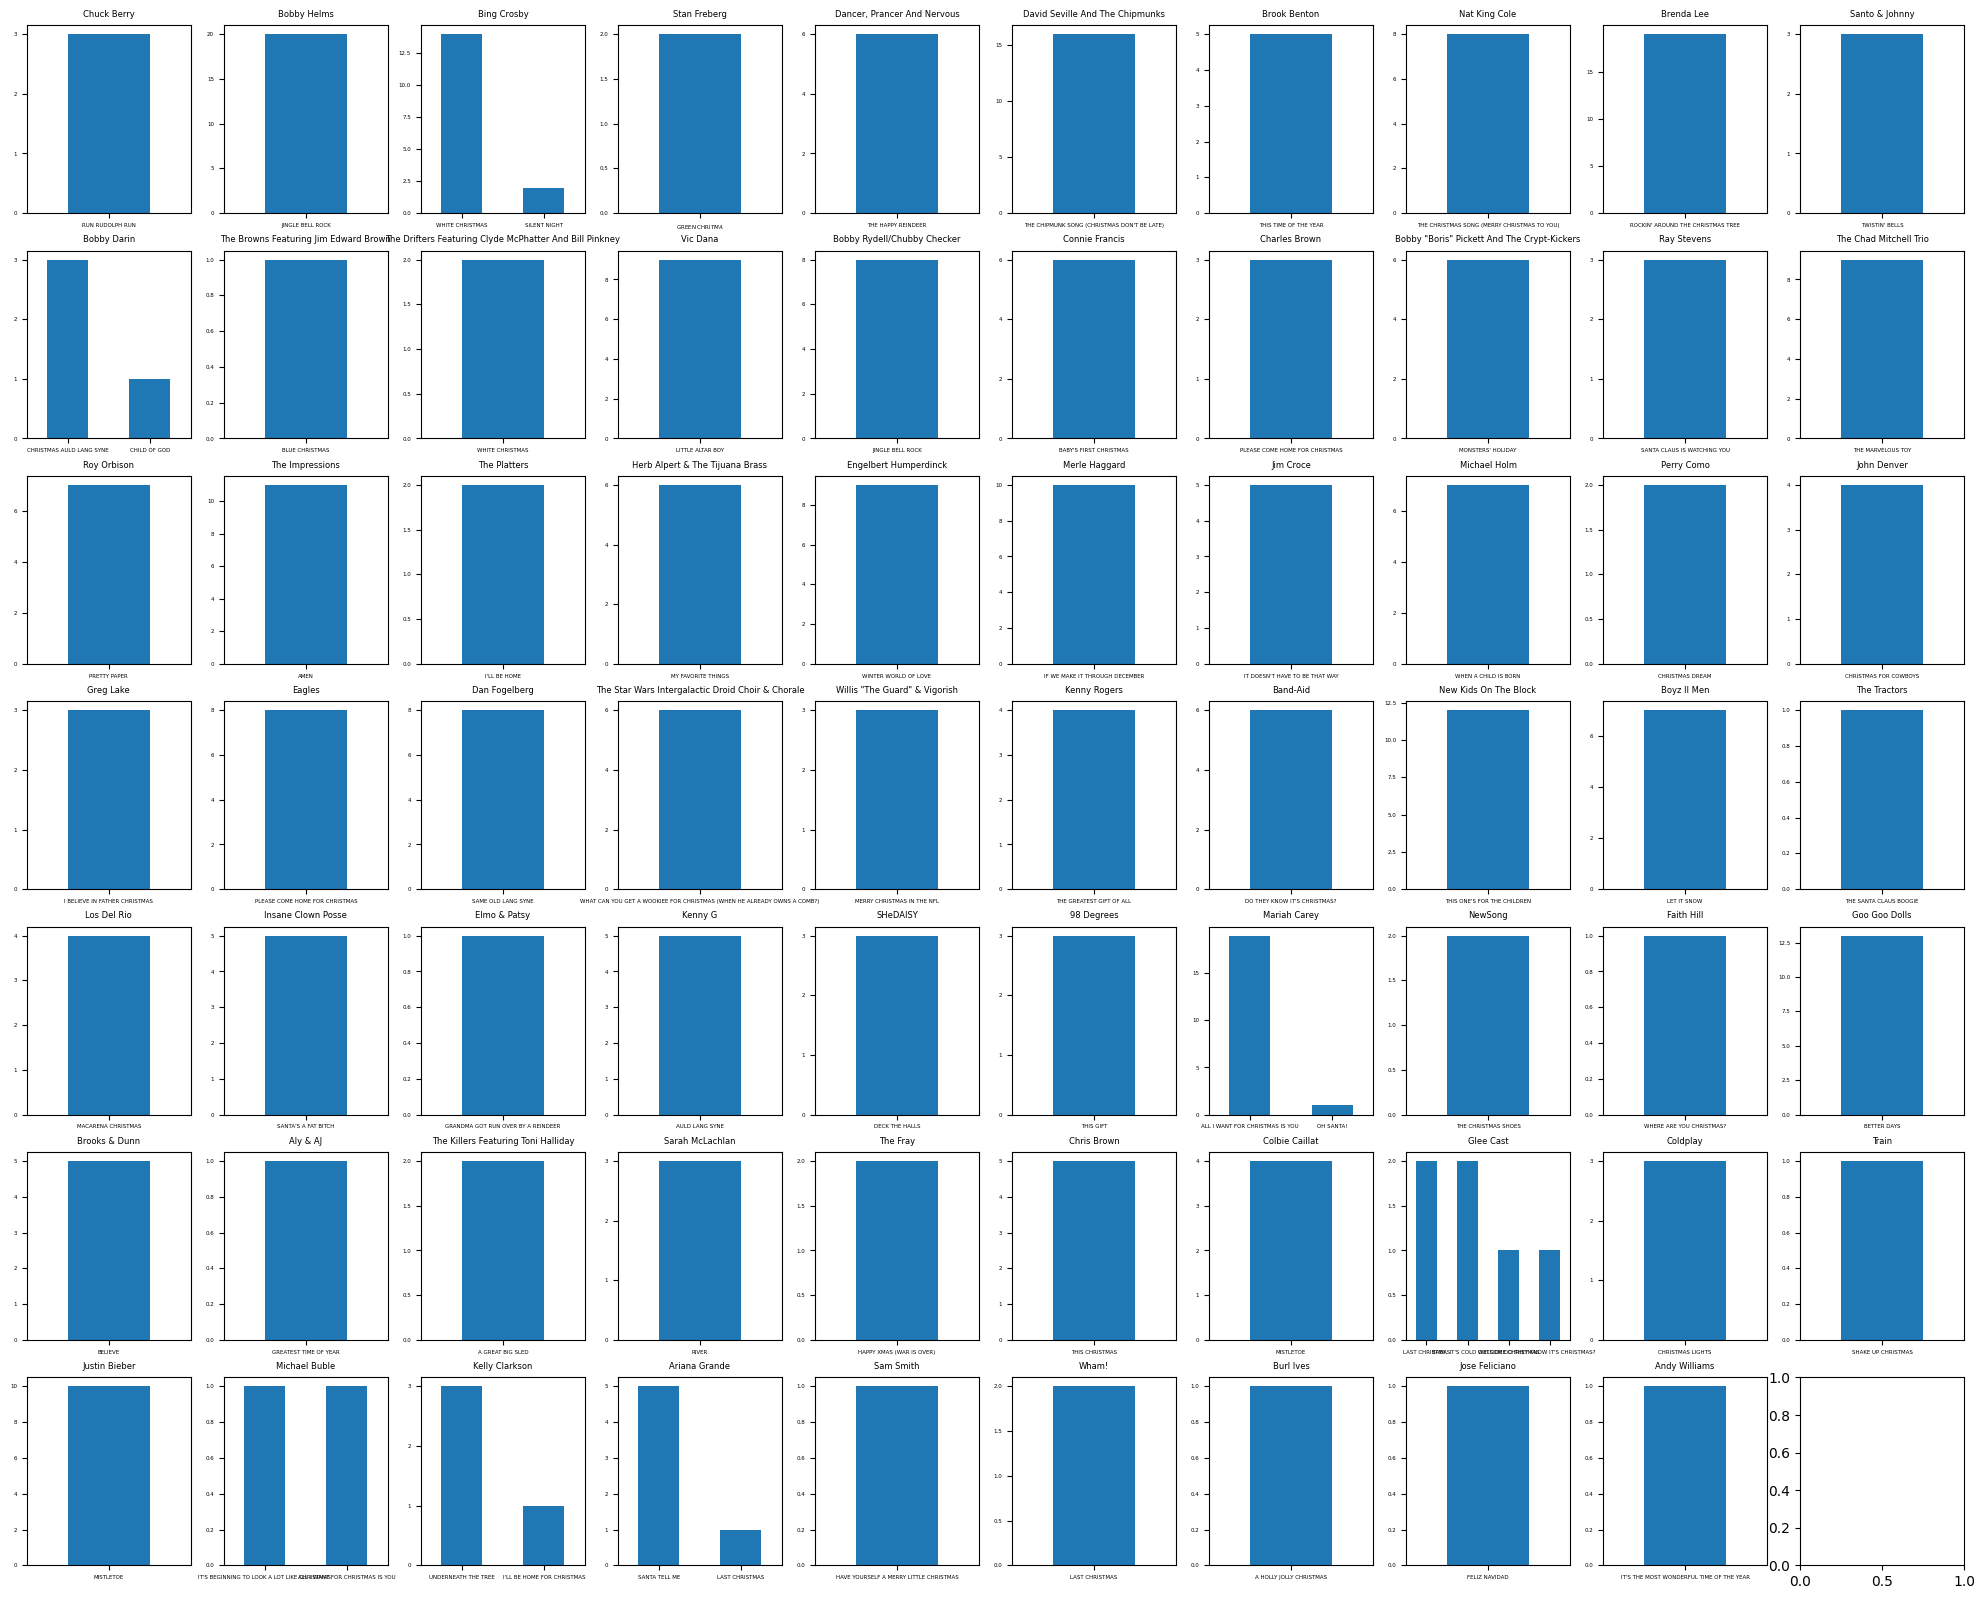

In [100]:
j = 0
k = 0
fig, axarr = plt.subplots(7, 10, figsize=(25, 20))
for i in list(df['performer'].unique()):
    if k == 10:
        k = 0
        j +=1

    df[df['performer'] == i]['song'].value_counts().plot.bar(
        ax=axarr[j][k], fontsize=4, linewidth=5
        )
    axarr[j][k].set_title(i, fontsize=6)
    axarr[j][k].tick_params(axis = 'x' ,labelsize=4, rotation=0)
 

    k += 1